In [5]:
import matplotlib.pyplot as plt
import numpy as np

class Option:
  def __init__(self, call, american, strike_price):
    self.call = 1 if call is "c" else 0
    self.american = 1 if category is "a" else 0
    self.strike_price = strike_price


In [ ]:
category = input("Enter the Type of Option (a for American, e for European): ")
type_of_option = input("Enter c for Call Option or p for Put Option: ")
time = input("Enter the Time to Maturity for this Option (in Years): ")
strike = input("Enter the Strike Price of the Option: ")
steps = input("Enter the number of Steps: ")
price = input("Enter the Price of Stock: ")
volatility = input("Enter the Volatility of Stock: ")
rf = input("Enter the Risk Free Rate: ")

time = float(time)
strike = float(strike)
steps = int(steps)
price = float(price)
volatility = float(volatility)
rf = float(rf)


# Default Values

In [3]:
category = "a"
type_of_option = "c"
time = 0.75
strike = 50
steps = 5
price = 50
volatility = 0.4
rf = 0.1

# a. Displaying the Tree

In [7]:
def BinomialTree(price, volatility, rf, type_of_option, time, strike, steps, category):
  option = Option(type_of_option, category, strike)
  delta_t = time / steps
  u = np.exp(volatility * (delta_t)**(0.5))
  d = 1/u
  a= np.exp(rf * (delta_t))
  p = (a - d)/(u - d)
  fig = plt.figure(dpi = 150, figsize = (20, 10))
  ax = fig.add_subplot()
  ax.text(0, 0, price, fontsize = 15)
  ax.axis("off")
  f = np.zeros([steps+1, steps+1])

  for i in reversed(range(1, steps+1)):
    for j in reversed(range(1, i+2)):
      fp = price*u**(i-j+1)*d**(j-1) #FuturePrice
      if i == steps:
        if option.call:
          f[i-1, j-1] = max(fp - option.strike_price, 0)
        else:
          f[i-1, j-1] = max(option.strike_price - fp, 0)
      else:
        fu = f[i, j-1]
        fd = f[i, j]
        if option.american:
          f[i-1, j-1] = max(np.exp(-rf*delta_t)*(p*fu + (1-p)*fd), max(fp - option.strike_price, 0) if option.call else max(option.strike_price - fp, 0))
        else:
          f[i-1, j-1] = np.exp(-rf*delta_t)*(p*fu + (1-p)*fd)
      if j != i+1:
        ax.plot([i-1+np.ceil(steps/4)*0.2, i-0.1], [i-2*j+1, i-2*j+2], color="k")
      if j != 1:
        ax.plot([i-1+np.ceil(steps/4)*0.2, i-0.1], [i-2*j+3, i-2*j+2], color="k")
      ax.text(i, i-2*j+2, round(fp, 2), fontsize = 15)
      ax.text(i, i-2*j+2-np.ceil(steps/3)*0.2, round(f[i-1, j-1], 2), fontsize = 15, color = "r")

  fu = f[0, 0]
  fd = f[0, 1]
  option_price = np.exp(-rf*delta_t)*(p*fu + (1-p)*fd)
  ax.text(0, -np.ceil(steps/3)*0.2, round(option_price, 2), fontsize = 15, color = "r")
  plt.show()

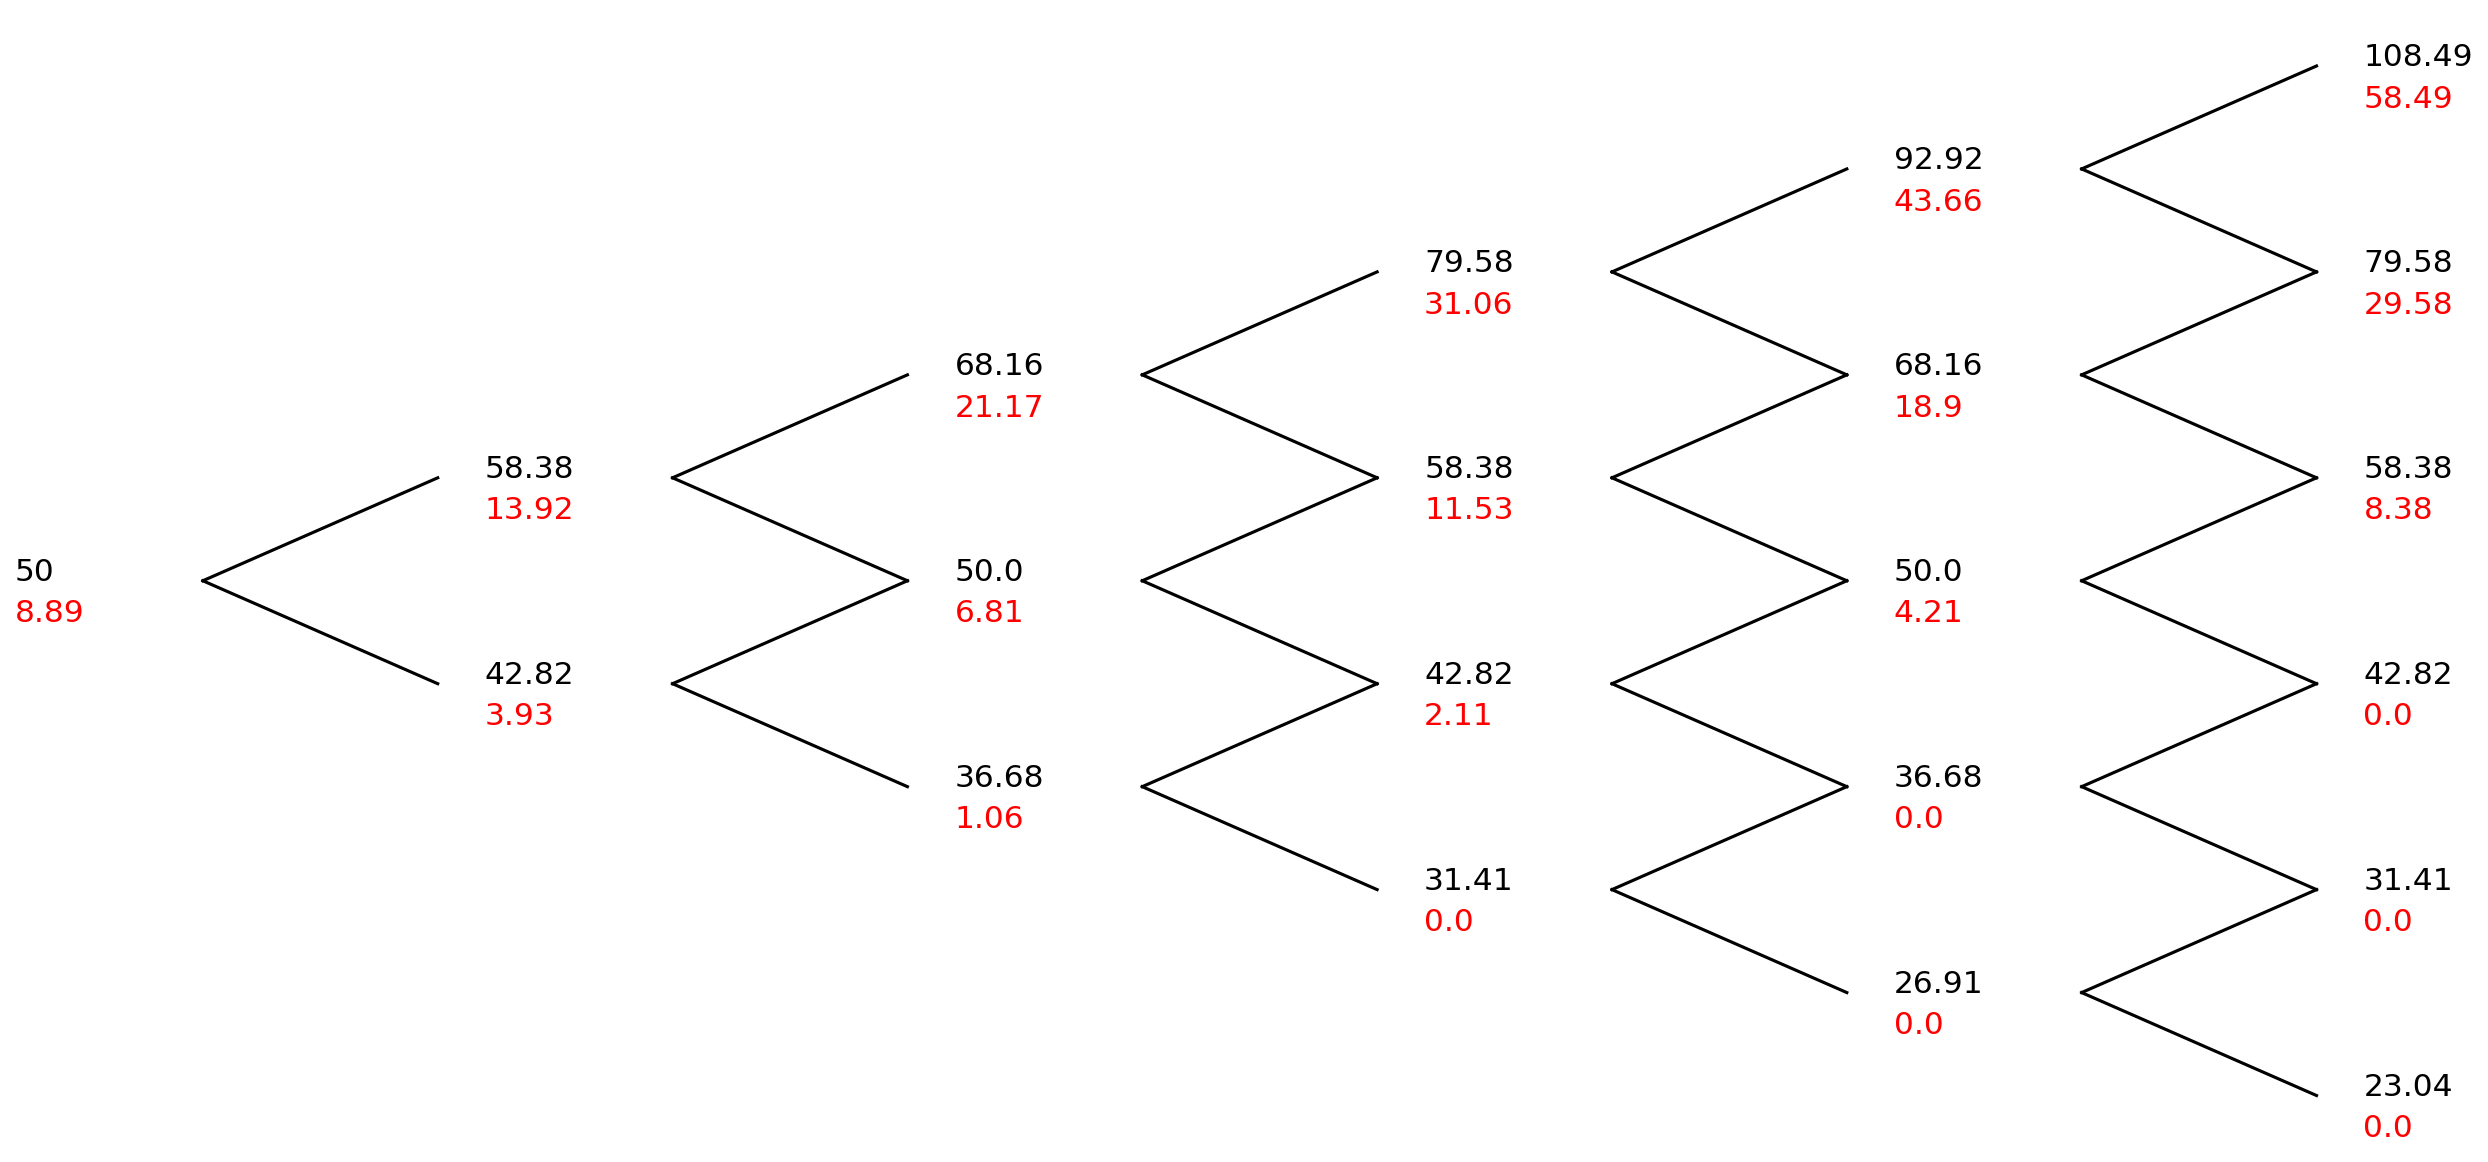

In [8]:
BinomialTree(price, volatility, rf, type_of_option, time, strike, steps, category)

# b. Compare the results with DerivaGem

# This code:

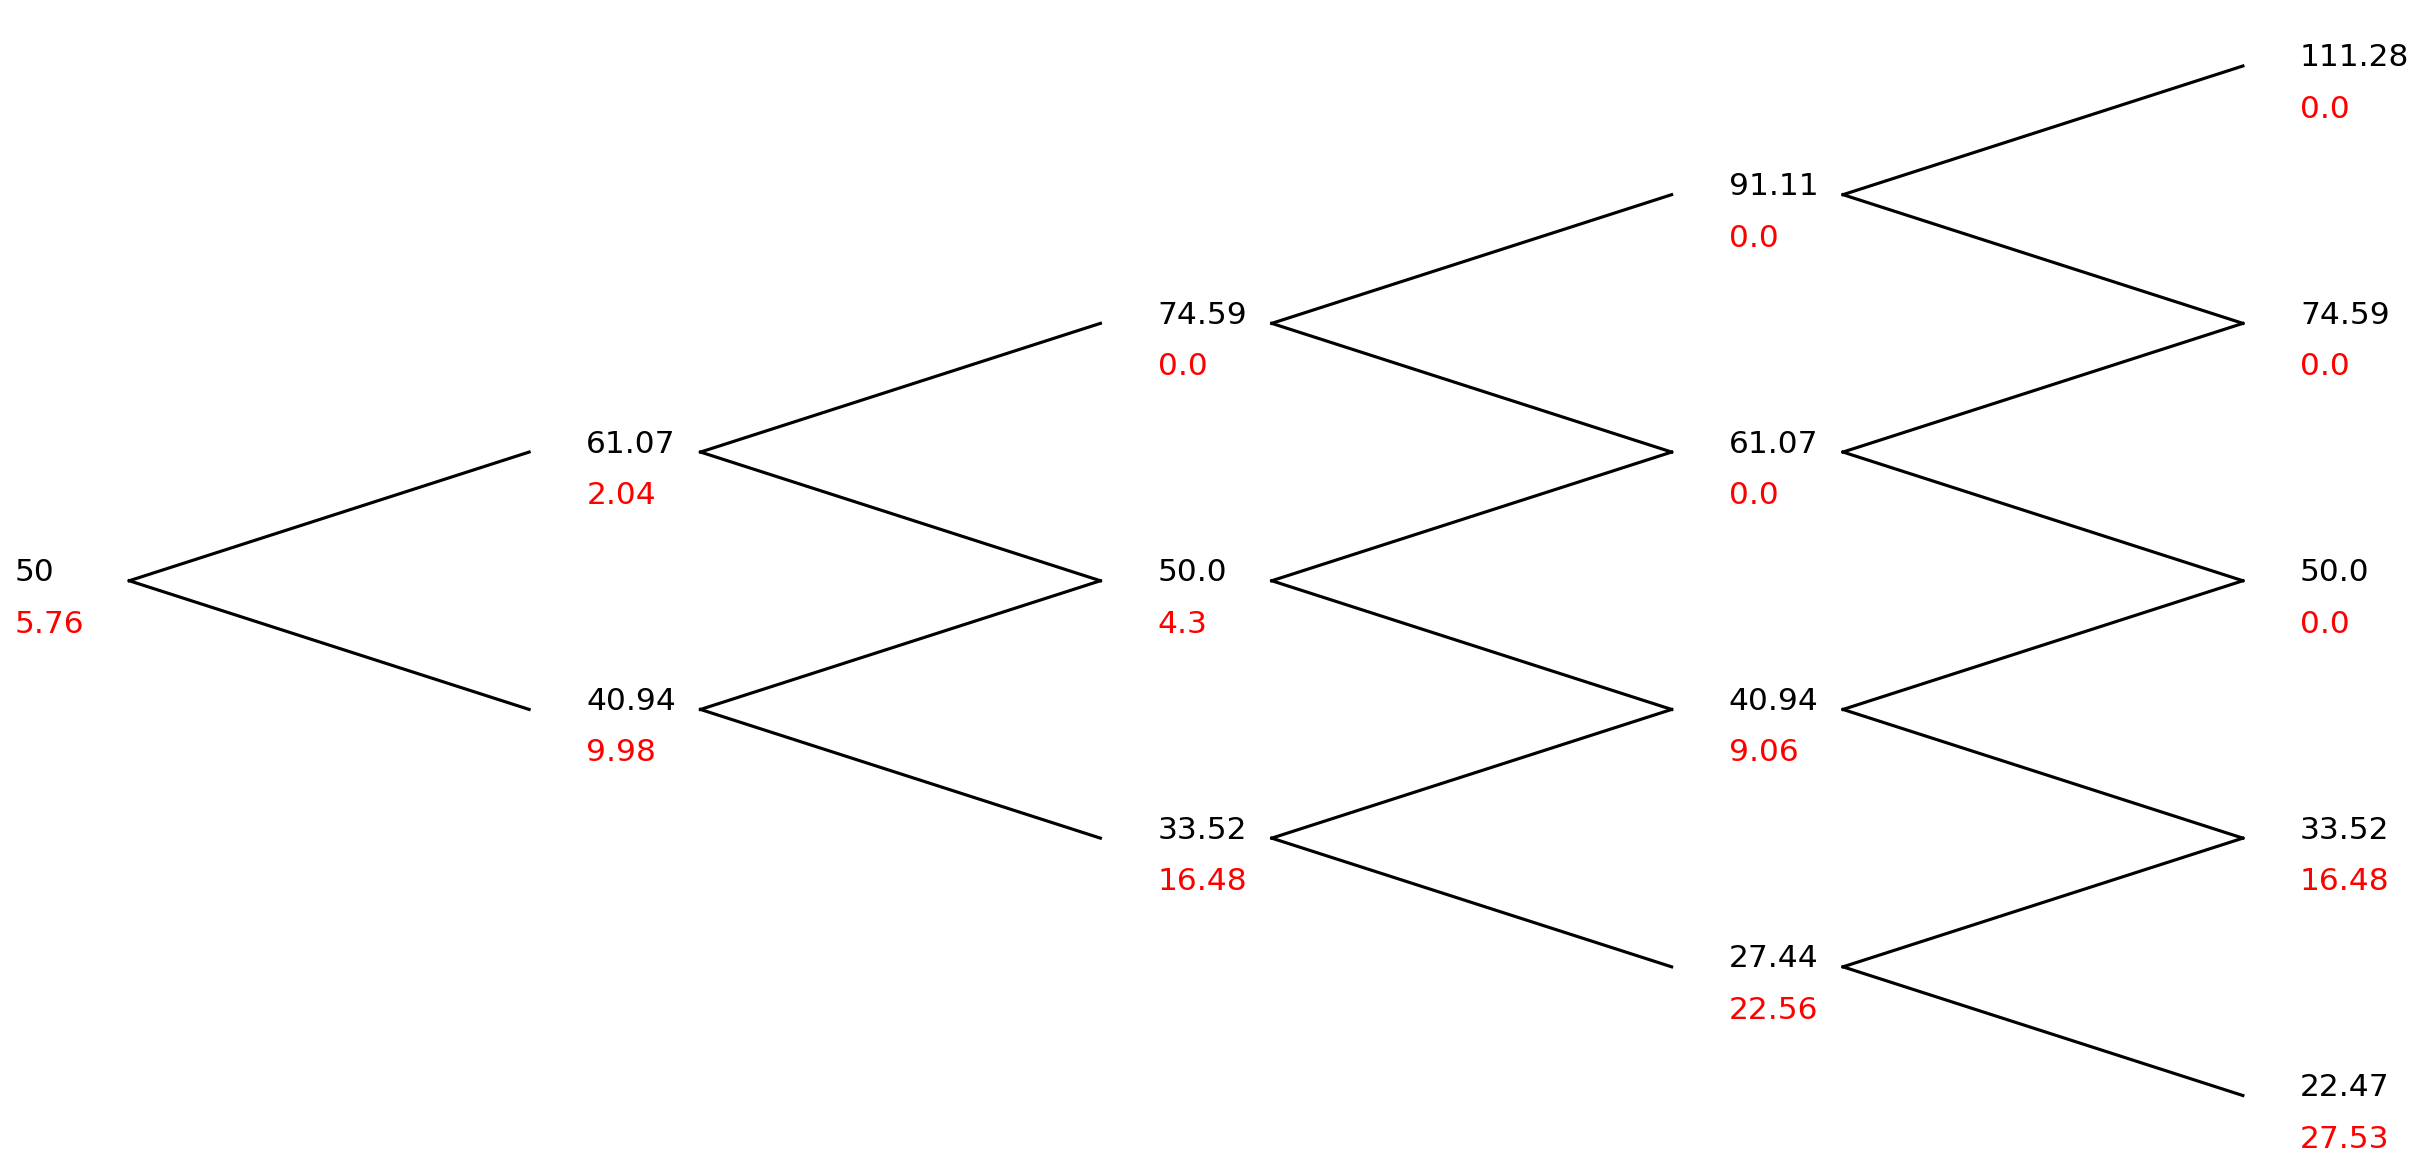

In [9]:
BinomialTree(50, 0.4, 0.1, "a", 1, 50, 4, "p")

# DerivaGem:

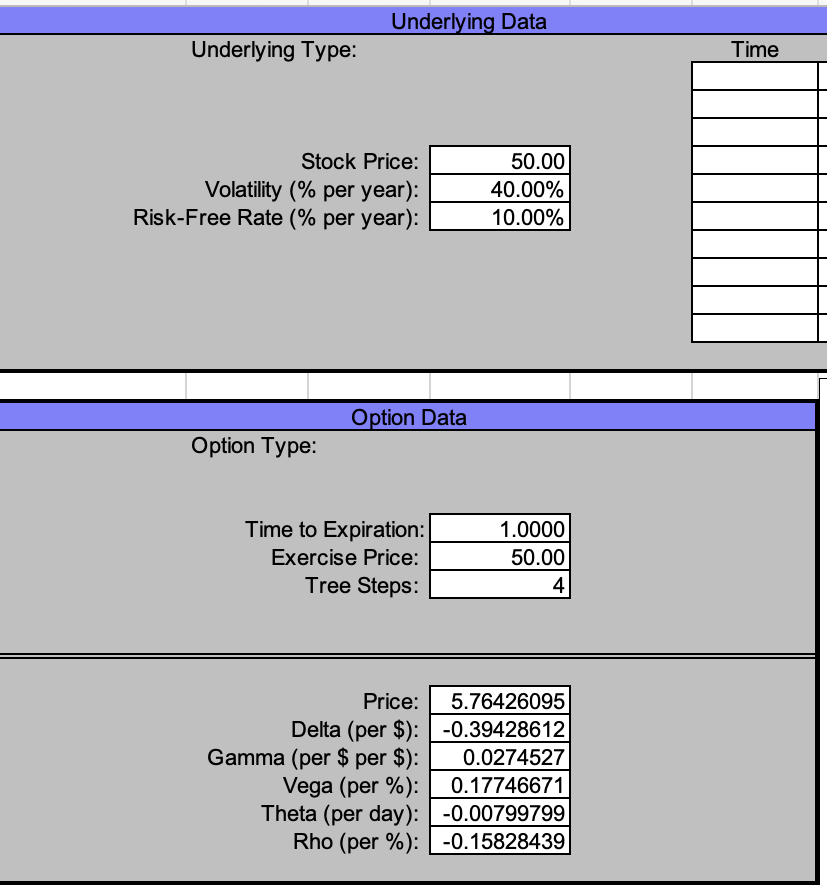

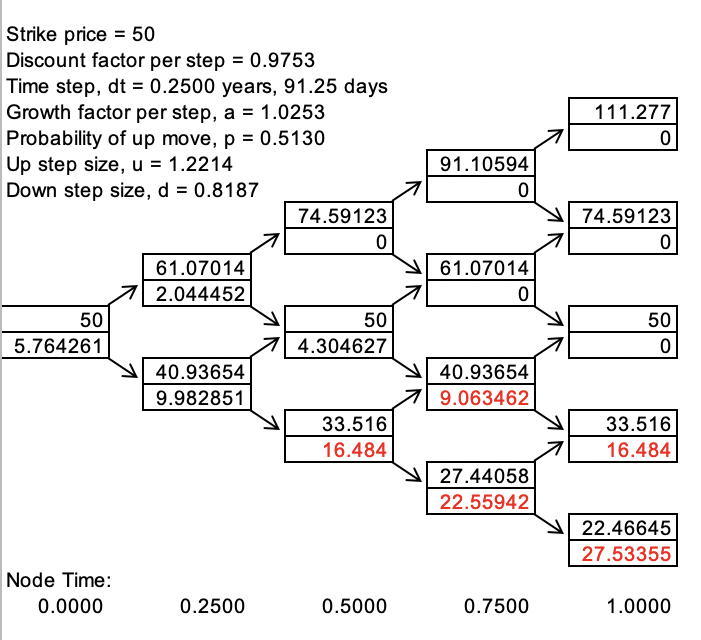

# The Results Are The Same.